<div style="border:solid Chocolate 2px; padding: 40px">
    
 <b>Добрый день, Виктор!</b>
    
Меня зовут Ксения Цыганова, и я буду комментировать твою работу и помогать тебе сделать ее сильнее. В Практикуме мы общаемся на «ты», но если тебе это будет некомфортно, пожалуйста, скажи, и мы будем обращаться друг к другу на «вы».
    
Все мои комментарии делятся на три вида:

    
👍 Здесь все отлично, идем дальше! - <font color='green'> зеленый цвет </font>
    
💡 Все хорошо, однако, можно оптимизировать или рассмотреть другие способы (необязательно для исполнения, чтобы пройти дальше) - <font color='gold'>желтый цвет</font>
    
🤔 Необходимо внести исправления, без которых я не смогу принять проект - <font color='red'>красный цвет</font>
    
    
Свои комментарии я буду выделять заголовком «комментарий ревьюера». Пожалуйста, не удаляй их, это поможет сократить время проверки на повторных ревью.Ты также можешь писать свои комментарии к моим и выделять их любым понравившимся способом, отличным от моего. Если у тебя будут возникать вопросы в течение нашей работы, я с радостью на них отвечу.

Цель моего ревью не критика и не возможность дать тебе готовые ответы, это способ привести тебя в нужное русло, чтобы ты смог развить собственные идеи и решения. Твой будущий работодатель будет поступать похожим образом. 
        
   <b>У тебя все получится!</b>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Инструкция по выполнению проекта

Чтобы усилить исследование, не ограничивайтесь градиентным бустингом. Попробуйте более простые модели — иногда они работают лучше. Эти редкие случаи легко пропустить, если всегда применять только бустинг. 

Поэкспериментируйте и сравните характеристики моделей: время обучения, время предсказания, точность результата.

# Основные шаги:

1. Загрузите данные, путь к файлу:  */datasets/autos.csv*.
2. Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их.
3. Подготовьте выборки для обучения моделей.
4. Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.
5. Проанализируйте время обучения, время предсказания и качество моделей.
6. Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть вступительный комментарий и содержание.

## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyRegressor
from sklearn.compose import make_column_transformer

from lightgbm import LGBMRegressor




<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что все импорты собраны в одном месте в начале проекта. Это поможет в случае чего сразу увидеть, какие библиотеки следует доустановить.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Стоит учитывать рекомендации PEP-8 при оформлении проекта, в том числе импортов. С ними можно познакомиться по ссылке: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html

In [1]:
path = '/datasets/autos.csv'
if os.path.exists(path):
    data = pd.read_csv(path)
else:
    print('Что-то пошло не так')

NameError: name 'os' is not defined

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
data_shape0 = data.shape[0]

In [5]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
data = data.rename(columns={'DateCrawled': 'date_crawled', 'VehicleType': 'vehicle_type', 
                            'RegistrationMonth':'registration_month', 'FuelType':'fuel_type',
                           'DateCreated':'date_created', 'NumberOfPictures':'number_of_pictures',
                           'PostalCode':'postal_code', 'LastSeen':'last_seen', 'RegistrationYear':'registration_year'})

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что работаешь со стилем.

In [7]:
data.columns = [column.lower() for column in data.columns]

In [8]:
data.isna().sum()# число пропущенных значений

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [9]:
data.duplicated().sum() # число дубликатов

4

In [10]:
data_date_created = data['date_created']

In [11]:
data = data.drop(columns=['date_crawled','date_created', 'postal_code', 'number_of_pictures', 'last_seen'])

In [12]:
data['vehicle_type'].unique(), data['fuel_type'].unique(), data['gearbox'].unique(),\
data['model'].unique(), data['brand'].unique()

(array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
        'wagon', 'other'], dtype=object),
 array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
        'electric'], dtype=object),
 array(['manual', 'auto', nan], dtype=object),
 array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
        '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
        'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
        'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
        'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
        'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
        'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
        'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
        '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
        'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', '

In [13]:
data[['vehicle_type', 'fuel_type', 'model']] = data[['vehicle_type', 'fuel_type', 'model']].fillna('other')


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь 2 раза используется fuel_type для заполнения.

In [14]:
np.random.seed(1234)
data['repaired'] = data['repaired'].fillna(pd.Series(np.random.randint(0, 2, size=len(data)), index=data.index))# заполенение случайными значениями
data['repaired'] = data['repaired'].replace(['yes', 'no'],[1, 0]) # заполняем пропуски в столбеце случайными значениями

In [15]:
np.random.seed(12345)
random_int = np.random.randint(0, 2, size=len(data))
data['gearbox'] = data['gearbox'].fillna(pd.Series([['manual', 'auto'][i] for i in random_int] , index=data.index))# заполенение случайными значениями 

In [16]:
data.isna().sum().sum()# суммарное число пропусков

0

In [17]:
# le = LabelEncoder()
# code_columns = ['model', 'brand', 'vehicle_type', 'fuel_type', 'gearbox']
# data[code_columns] = data[code_columns].apply(lambda col: le.fit_transform(col)) #кодировка code_columns при помощи LabelEncoder

In [18]:
data.info()# информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               354369 non-null  int64 
 1   vehicle_type        354369 non-null  object
 2   registration_year   354369 non-null  int64 
 3   gearbox             354369 non-null  object
 4   power               354369 non-null  int64 
 5   model               354369 non-null  object
 6   kilometer           354369 non-null  int64 
 7   registration_month  354369 non-null  int64 
 8   fuel_type           354369 non-null  object
 9   brand               354369 non-null  object
 10  repaired            354369 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 29.7+ MB


In [19]:
# ohe = OneHotEncoder(drop = 'first') # кодируем категориальные данные с помощью OHE
# array_hot_encoded = ohe.fit_transform(data[code_columns[1:]]).toarray()


# data_hot_encoded = pd.DataFrame(array_hot_encoded, index=data.index)


# data_other_cols = data.drop(columns=code_columns[1:])

# data_cod = pd.concat([data_hot_encoded, data_other_cols], axis=1)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Обрати, пожалуйста, внимание:
    
если ты проводишь кодирование с помощью кодировщиков типа OrdinalEncoder и OneHotEncoder, то стоит это делать после разделения на выборки. То есть по аналогии со StandardScaler: обучаем кодер только на тренировочной выборки, а  трансформируем все с помощью него.

In [20]:
numeric = ['price', 'registration_year', 'power',
       'registration_month'] # переведем kilometer в категориальные признаки 
data[numeric].describe()# информация о столбцах numeric

,price,registration_year,power,registration_month
count,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,5.714645
std,4514.158514,90.227958,189.850405,3.726421
min,0.000000,1000.000000,0.000000,0.000000
25%,1050.000000,1999.000000,69.000000,3.000000
50%,2700.000000,2003.000000,105.000000,6.000000
75%,6400.000000,2008.000000,143.000000,9.000000
max,20000.000000,9999.000000,20000.000000,12.000000


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
    
Model - это не численный признак

In [21]:
data.isna().sum().sum()# число пропущенных значений

0

In [22]:
data['kilometer'].unique()

array([150000, 125000,  90000,  40000,  30000,  70000,   5000, 100000,
        60000,  20000,  80000,  50000,  10000])

In [23]:
data_date_created = pd.to_datetime(data_date_created, format='%Y-%m-%d %H:%M:%S')

In [24]:
data_cut = data.loc[data['registration_year']<= data_date_created.dt.year]

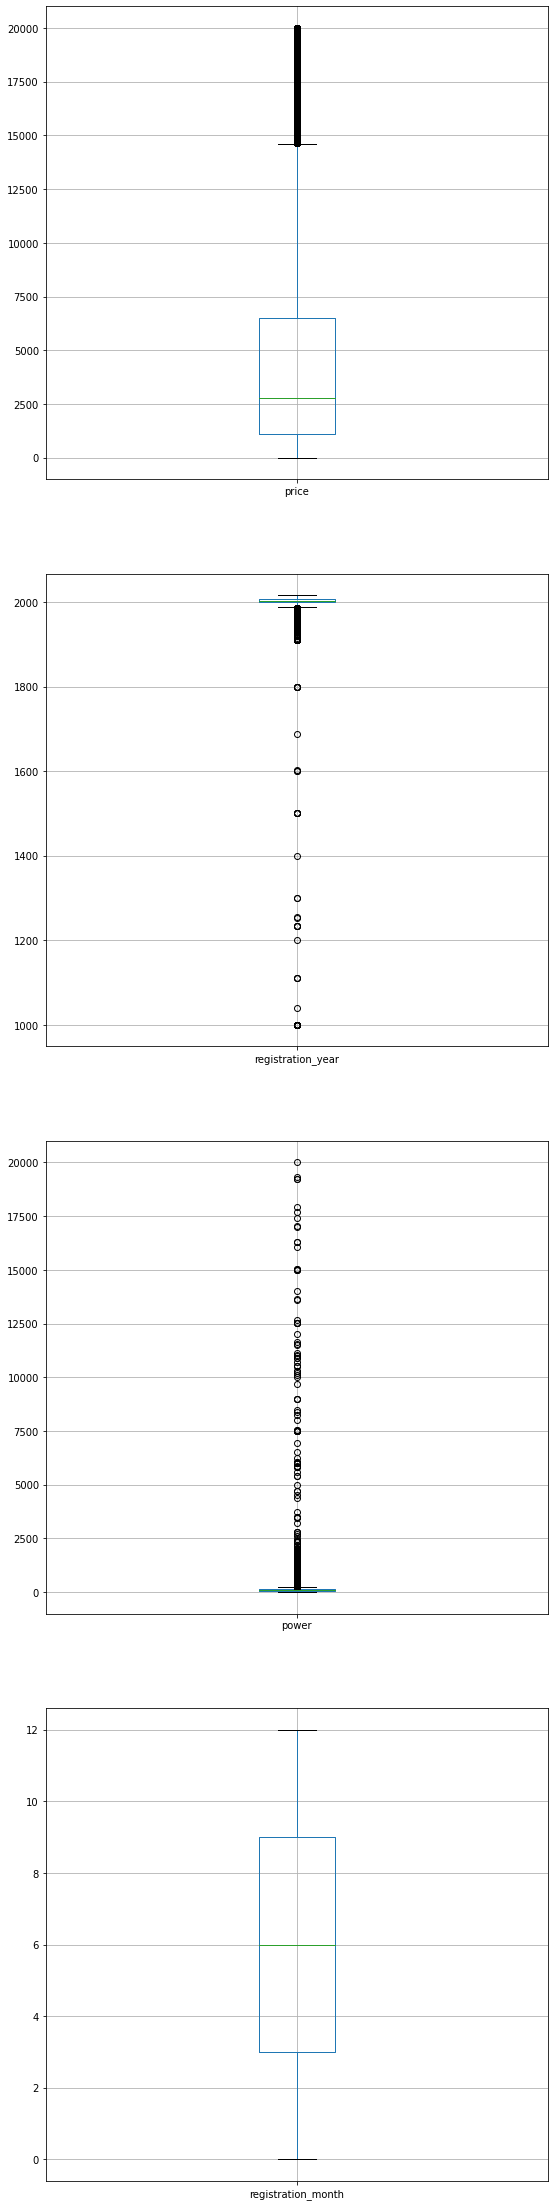

In [25]:
fig, axes = plt.subplots(4, 1, figsize=(9, 40))
i = 1
for name in numeric: # boxplot для колонок из numeric
    plt.subplot(4, 1, i)
    data_cut[[name]].boxplot(figsize=(14, 6));
    i += 1

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что визуализируешь выбросы.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь интересно посмотреть на то, какие есть уникальные значения у Kilometer.
        
Они только строго определенные и круглые. Возможно, это связано с особенностями заполнения анкеты.
        
Есть гипотеза, что можно попробовать в связи с этим перевести этот признак в категориальные. Но надо смотреть, какой из положительно отразится на метрике.

In [26]:
data_cut = data_cut.query('0 < price< 16500 and power < 1250 and registration_year > 1950')# удаляем часть выбросов


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Здесь стоит обратить внимание на даты, которые есть в датасете, чтобы выбрать верхнюю границу года регистрации. Год регистрации автомобиля не может быть больше даты создания объявления, например.
    
Кроме того стоит обработать нудевые значения в price, так как это может напрямую влиять на ответ модели.

In [27]:
data_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319155 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               319155 non-null  int64 
 1   vehicle_type        319155 non-null  object
 2   registration_year   319155 non-null  int64 
 3   gearbox             319155 non-null  object
 4   power               319155 non-null  int64 
 5   model               319155 non-null  object
 6   kilometer           319155 non-null  int64 
 7   registration_month  319155 non-null  int64 
 8   fuel_type           319155 non-null  object
 9   brand               319155 non-null  object
 10  repaired            319155 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 29.2+ MB


In [28]:
1 - data_cut.shape[0]/data_shape0 # доля потерь

0.09937099464117916

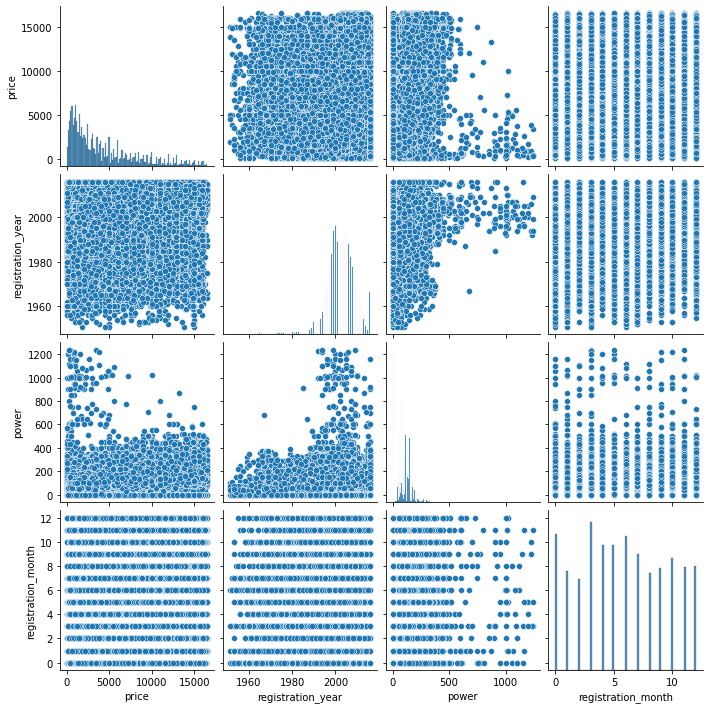

In [29]:
sns.pairplot(data_cut[numeric]);

In [30]:
data_cut[numeric].corr()

,price,registration_year,power,registration_month
price,1.000000,0.447703,0.453077,0.098260
registration_year,0.447703,1.000000,0.128173,0.063408
power,0.453077,0.128173,1.000000,0.109332
registration_month,0.098260,0.063408,0.109332,1.000000


1. Теоретически некоторые данные могут совпадать, поэтому удалять дубликаты не требуется.
2. Удалим столбцы, которые не нужны для предсказания стоимости автомобиля. 
3. Заполним пропущенные значения в столбце `repaired` случайными значениями 0 или 1 и заменим строки *yes* и *no* на 1 и 0 соответственно.  Пропущенные значения в столбце `gearbox` заменим в случайном порядке строками *manual* или *auto*. Пропущенные значения в столбцах `vehicle_type`, `fuel_type` и `model` отнесем к категории *other*. 
4. Удалили выбросы, доля потерь не превышает 10%.
5. Распределения численных признаков схожи с распределением Пуассона, наибольшая корреляция для численных признаков наблюдается между ценой и годом регистрации, ценой и мощностью автомобиля.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что пишешь промежуточный вывод.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Можно также построить диаграммы рассеяния для численных переменных, чтобы более подробно изучить характер взаимосвязи между переменными, и провести корреляционный анализ.
        
Также можно посмотреть на распределения на гистограммах численных признаков.

## Обучение моделей

### Разделение и подготовка выборок 

In [31]:
features = data_cut.drop(['price'], axis=1)
target = data_cut['price']

In [32]:
features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)# отделяем 80% данных для обучающей и валидацианной выборки


In [33]:
print(features_train_valid.shape)
print(features_test.shape)
print(target_train_valid.shape)
print(target_test.shape)

(255324, 10)
(63831, 10)
(255324,)
(63831,)


In [34]:
numeric_features = numeric[1:]

scaler = StandardScaler() 
scaler.fit(features_train_valid[numeric_features])

features_train_valid_tmp = features_train_valid.copy().reset_index(drop=True)
features_train_valid_tmp.loc[:, numeric_features] = scaler.transform(features_train_valid[numeric_features]) # масштабирование
features_test_tmp = features_test.copy().reset_index(drop=True)
features_test_tmp.loc[:, numeric_features] = scaler.transform(features_test[numeric_features])


In [35]:
le = LabelEncoder()#unknown_value=-1
code_columns = ['model', 'brand', 'vehicle_type', 'fuel_type', 'gearbox', 'kilometer'] # добавил kilometer


features_train_valid_labeled = features_train_valid_tmp.copy()
features_test_labeled = features_test_tmp.copy()

for col in code_columns:
    le.fit(features_train_valid_tmp[col])
    features_train_valid_labeled[col] = le.transform(features_train_valid_tmp[col]) # масштабирование
    features_test_labeled[col] = le.transform(features_test_tmp[col])

In [36]:
ohe = OneHotEncoder(drop = 'first') # кодируем категориальные данные с помощью OHE
ohe.fit(features_train_valid_labeled[code_columns[1:]])

array_hot_encoded_train_valid = ohe.transform(features_train_valid_labeled[code_columns[1:]]).toarray()
array_hot_encoded_test = ohe.transform(features_test_labeled[code_columns[1:]]).toarray()

data_hot_encoded_train_valid = pd.DataFrame(array_hot_encoded_train_valid, index=features_train_valid_labeled.index)
data_hot_encoded_test = pd.DataFrame(array_hot_encoded_test, index=features_test_labeled.index)

data_other_cols_train_valid = features_train_valid_labeled.drop(columns=code_columns[1:])
data_other_cols_test = features_test_labeled.drop(columns=code_columns[1:])

features_train_valid_hot_encoded = pd.concat([data_hot_encoded_train_valid, data_other_cols_train_valid], axis=1)
features_test_hot_encoded = pd.concat([data_hot_encoded_test, data_other_cols_test], axis=1)

In [37]:
features_train_valid_hot_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,registration_year,power,model,registration_month,repaired
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.539794,-0.502888,75,-1.304706,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.145270,-0.263669,119,-0.490742,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.750746,-0.598576,173,-1.304706,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.448008,0.039342,187,0.594544,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.691163,0.533728,28,1.679829,0


<div class="alert alert-info"> <b>Комментарий студента:</b>
Привет. Столбец model я пробовал преобразовать методом OHE, но тогда при переходе к ячейке с train_test_split ядро умирает.

</div>




In [38]:
target_test = target_test.reset_index(drop=True)
target_train_valid = target_train_valid.reset_index(drop=True)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Привет! Можно попробовать применить только к model порядковое кодирование, а к остальным one-hot кодирование для обучения линейной регрессии.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Масштабирование проведено корректно.

In [39]:
del data, features_train_valid, features_test, features, target

Разделили данные на выборки, сделали масштабирование признаков, создали выборки с категориальными значениями, закодированными с помощью LabelEncoder и OHE отдельно.

### Случайный лес




        
<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для моделей на основе деревьев решений лучше использовать порядковое кодирование категориальных признаков. Можно отдельно подготовить выборки для этой модели.

In [40]:
grid = GridSearchCV( # для подбора параметров случайного леса
    RandomForestRegressor(random_state=12345),
    param_grid={'max_depth':range(12, 17, 2), 'n_estimators':range(90, 101, 10)}, # меняем гиперпараметры
    scoring = 'neg_mean_squared_error', 
    cv = 4, # разделение данных на 4 части, одну из них используем как валидационную
    n_jobs=-1
)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что перебираешь гиперпараметры.

In [41]:
%%time
grid.fit(features_train_valid_labeled, target_train_valid)


KeyboardInterrupt: 

In [42]:
best_forest = grid.best_estimator_# лучший лес

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
best_forest

In [ ]:
forest_mean_fit_time = grid.cv_results_['mean_fit_time']
forest_mean_score_time = grid.cv_results_['mean_score_time']

In [ ]:
print("Cреднее время обучения для одной выборки при разных наборах параметров в секундах:", forest_mean_fit_time)
print("Cреднее время предсказания для одной выборки при разных наборах параметров в секундах:", forest_mean_score_time)

In [ ]:
best_index_forest = np.argmin(grid.cv_results_['rank_test_score'])
print("Cреднее время обучения для одной выборки при лучшем наборе параметров в секундах:", 
      forest_mean_fit_time[best_index_forest])
print("Cреднее время предсказания для одной выборки при лучшем наборе параметров в секундах:", 
      forest_mean_score_time[best_index_forest])

In [ ]:
score_forest = (-grid.best_score_)**0.5
print('Значение RMSE для лучших параметров случайного леса на валидационных данных:', score_forest)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что оцениваешь качество на кросс-валидации.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Для каждой изучаемой тобой модели стоит отдельно измерить время на predict на тренировочной выборке. 

### Линейная регрессия 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

Для линейной регрессии стоит использовать one-hot кодирование категориальных переменных.

In [ ]:
model = LinearRegression()

In [ ]:
%%time
lr = cross_validate(model, features_train_valid_hot_encoded, 
                         target_train_valid, scoring = 'neg_mean_squared_error', cv = 4, return_train_score=True)

In [ ]:
lr.keys()

In [ ]:
lr_fit_time = lr['fit_time']
lr_score_time = lr['score_time']
print("Cреднее время обучения для одной выборки в секундах:", lr_fit_time.mean())
print("Cреднее время предсказания для одной выборки в секундах:", lr_score_time.mean())

In [ ]:
score_lr= (-lr['test_score'].mean())**0.5
print('Среднее значение RMSE для различных валидационных и тренировочных выборок:', score_lr)

### LightGBM

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Для LightGBM стоит использовать порядковое кодирование категориальных переменных.
    
Либо воспользоваться внутренним алгоритмом кодирования, то есть подавать в модель незакодированные предварительно фичи.
    
Пример:
    
https://www.kaggle.com/code/mlisovyi/beware-of-categorical-features-in-lgbm

In [ ]:
grid = GridSearchCV( # для подбора параметров случайного леса
    LGBMRegressor(random_state=12345),
    param_grid={'max_depth':range(12, 17, 2), 'n_estimators':range(90, 101, 10)}, # меняем гиперпараметры
    scoring = 'neg_mean_squared_error', 
    cv = 4, # разделение данных на 4 части, одну из них используем как валидационную
    n_jobs =-1
)



In [ ]:
%%time
grid.fit(features_train_valid_labeled, target_train_valid)

In [ ]:
best_LGBM = grid.best_estimator_

In [ ]:
best_LGBM

In [ ]:
LGBM_mean_fit_time = grid.cv_results_['mean_fit_time']
LGBM_mean_score_time = grid.cv_results_['mean_score_time']

In [ ]:
print("Cреднее время обучения для одной выборки при разных наборах параметров в секундах:", LGBM_mean_fit_time)
print("Cреднее время предсказания для одной выборки при разных наборах параметров в секундах:", LGBM_mean_score_time)

In [ ]:
best_index_LGBM = np.argmin(grid.cv_results_['rank_test_score'])
print("Cреднее время обучения для одной выборки при лучшем наборе параметров в секундах:", LGBM_mean_fit_time[best_index_LGBM])
print("Cреднее время предсказания для одной выборки при лучшем наборе параметров в секундах:", 
      LGBM_mean_score_time[best_index_LGBM])

In [ ]:
score_LGBM = (-grid.best_score_)**0.5
print('Значение RMSE для лучших параметров LightGBM на валидационных данных:', score_LGBM)

Минимальное значение RMSE на валидационных данных дает модель случайного леса, но она обучается медленнее других.

In [ ]:
model_compare= pd.DataFrame({'Название модели':['RandomForest', 'LinearRegression', 'LightGBM'],
                           'Время обучения в секундах для лучших значений параметров для одной выборки':
                           [forest_mean_fit_time[best_index_forest], lr_fit_time.mean(), 
                            LGBM_mean_fit_time[best_index_LGBM]],
                          'Время предсказания в секундах для лучших значений параметров для одной выборки':
                          [forest_mean_score_time[best_index_forest], lr_score_time.mean(), 
                           LGBM_mean_score_time[best_index_LGBM]],
                          'Суммарное время обучения и предсказания в секундах при переборе параметров для одной выборки':
                          [(forest_mean_fit_time+forest_mean_score_time).sum(), (lr_fit_time+lr_score_time).mean(),
                          (LGBM_mean_fit_time+LGBM_mean_score_time).sum()]})

model_compare.style.background_gradient(cmap='Reds')


        
<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
После того, как провел исследование всех моделей можно свести все полученные результаты по врменени обучения и предсказания и по качеству на кросс-валидации в одну таблицу, чтобы выбор лучшей модели был более наглядным.
        

## Анализ моделей

In [ ]:
best_model_score = mean_squared_error(best_forest.predict(features_test_labeled), target_test, squared=False)
print('Значение RMSE для лучшей модели на тестовых данных:', best_model_score)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что проверяешь только лучшую модель на тестовых данных

In [ ]:
model = DummyRegressor(strategy="mean")

model.fit(features_train_valid_labeled, target_train_valid)

predicted_test = model.predict(features_test_labeled)
dummy_model_score = mean_squared_error(target_test, predicted_test, squared=False)
print('Значение RMSE для DummyRegressor на тестовых данных:', dummy_model_score)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть сравнение с константной моделью.

Лучшая модель дает значение RMSE < 2500 на тестовых данных, значение RMSE для DummyRegressor больше чем для лучшей модели, это показывает адекватность модели.

## Вывод

Быстрее всего обучилась модель LinearRegression (DummyRegressor не учитываем), но дала самое большое среднее значение RMSE на валидационных данных. Модель LightGBM дала немного больше значение RMSE для валидационных данных и обучалась почти в 4 раза дольше. Наименьшее значение RMSE для валидационных данных получилось для модели случайного леса, было показано, что эта модель адекватна и дает на тестовых данных RMSE < 2500. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь я оставлю несколько интересных и полезных ссылок по теме:
        
        
1. "XGBoost, LightGBM or CatBoost — which boosting algorithm should I use?"

https://medium.com/riskified-technology/xgboost-lightgbm-or-catboost-which-boosting-algorithm-should-i-use-e7fda7bb36bc
        
        
2. "Transforming categorical features to numerical features"
        
https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic
        
        
3. "Градиентный Бустинг: самый частый вопрос на собеседовании на дата саентиста"
        
https://www.youtube.com/watch?v=ZNJ3lKyI-EY
        
4. "Tutorial: CatBoost Overview"
        
https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook
        
5. "Gradient Boosting from scratch"
        
https://blog.mlreview.com/gradient-boosting-from-scratch-1e317ae4587d

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту</b>

Виктор, спасибо за работу! Проект хороший, продуманный, структурно выдержанный. Однако стоит внести некоторые исправления, чтобы можно было считать проект завершенным. Также, пожалуйста, напиши комментарии в Markdown ячейках, чтобы можно было слудить за ходом твоих рассуждений.

**Положительные моменты проекта, которые хочу еще раз подчеркнуть:**

1. Удалены все лишние признаки и константный признак
2. Есть обработка некорректных и пропущенных значений
3. Кодирование категориальных признаков осуществляется.
4. Есть анализ времени обучения моделей, а также их качества
5. Предложена модель с учетом времени обучения, а также качества работы
6. Масштабирование численных призаков осуществляется корректно
    
**Замечания, на которые стоит обратить внимание при будущей работе:**
    
    1. Кодировать после разделения на выборки
    2. Для LightGBM и линейной регрессии стоит использовать соответствующие методы кодирования
    3. Время предсказания, когда есть только тренировочная и тестовая выборки, стоит измерять на тренировочной выборке (стоит измерить его для всех моделей)
    4. Стоит исправить обработку аномалий

    
    
Остальные комментарии ты найдешь выше.

**Желаю удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №2</b>

    
Виктор, спасибо за работу!
    
**Все хорошо, проект принимаю и желаю успехов в дальнейшем обучении!**

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей